In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('crime_rate_child_india.csv')

In [9]:
df

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,DELHI,TOTAL CRIMES AGAINST CHILDREN,386,391,437,558,590,1394,1247,1097,984,1020,1199,1351
490,LAKSHADWEEP,TOTAL CRIMES AGAINST CHILDREN,1,0,0,0,0,0,0,0,0,0,0,0
491,PUDUCHERRY,TOTAL CRIMES AGAINST CHILDREN,4,23,5,13,11,39,22,25,20,22,29,32
492,TOTAL (UTs),TOTAL CRIMES AGAINST CHILDREN,450,455,496,613,693,1499,1342,1268,1147,1185,1334,1495


In [5]:
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5


In [6]:
years_title =[str(i) for i in range(2001,2013)]

In [7]:
STATES_IN_INDIA = df['STATE/UT'].unique()
STATES_IN_INDIA = STATES_IN_INDIA[:-4]
STATES_IN_INDIA

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI'], dtype=object)

In [8]:
TYPES_OF_CASES = df['CRIME HEAD'].unique()
TYPES_OF_CASES = TYPES_OF_CASES[:-1]
TYPES_OF_CASES


array(['INFANTICIDE', 'MURDER OF CHILDREN', 'RAPE OF CHILDREN',
       'KIDNAPPING and ABDUCTION OF CHILDREN', 'FOETICIDE',
       'ABETMENT OF SUICIDE', 'EXPOSURE AND ABANDONMENT',
       'PROCURATION OF MINOR GILRS', 'BUYING OF GIRLS FOR PROSTITUTION',
       'SELLING OF GIRLS FOR PROSTITUTION',
       'PROHIBITION OF CHILD MARRIAGE ACT',
       'OTHER CRIMES AGAINST CHILDREN'], dtype=object)

C:\Users\vikas\AppData\Local\Temp\ipykernel_3472\1053416908.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(8, 4),dpi= 40, facecolor='w', edgecolor='k')


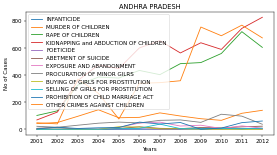

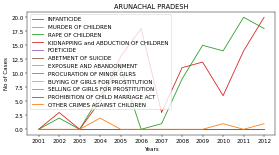

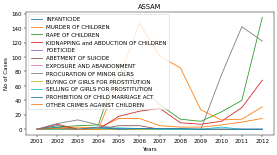

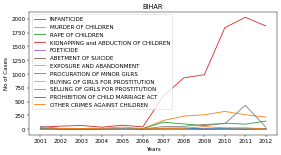

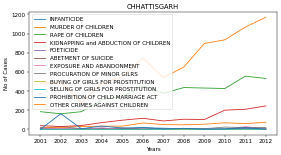

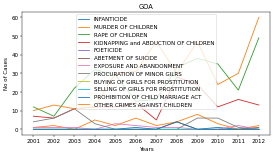

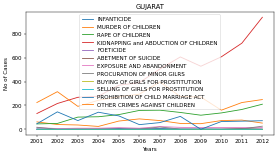

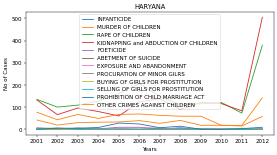

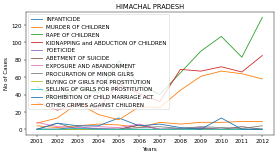

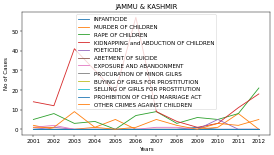

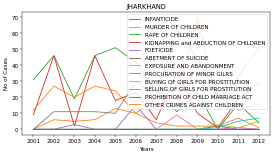

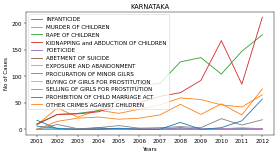

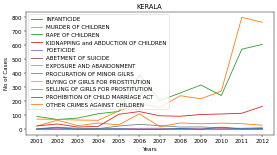

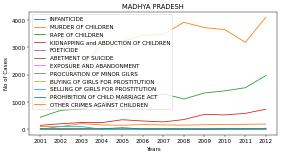

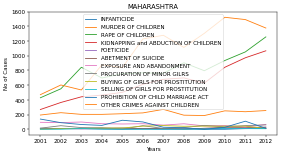

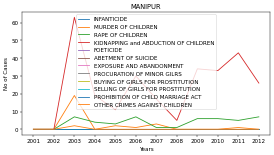

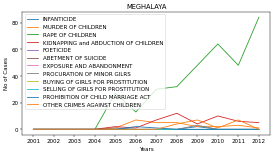

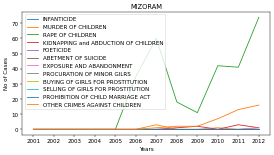

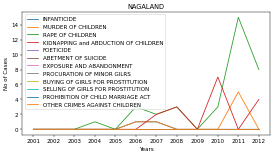

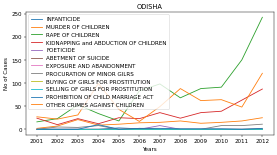

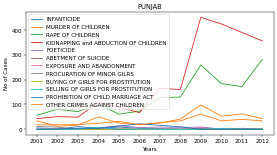

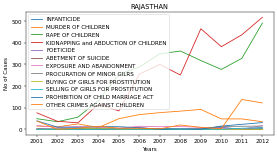

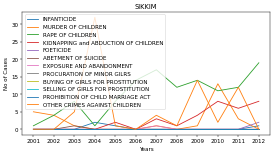

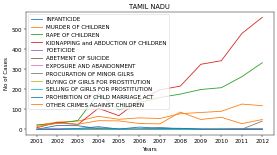

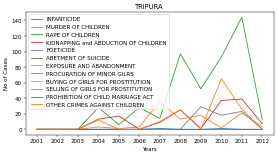

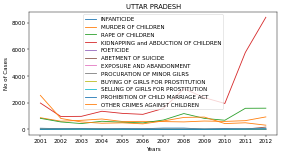

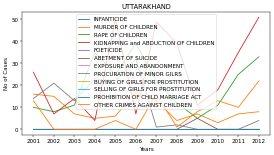

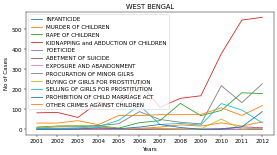

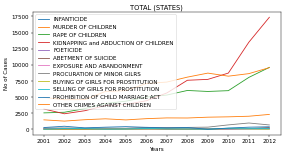

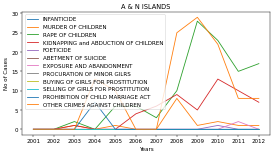

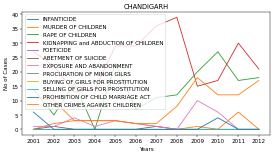

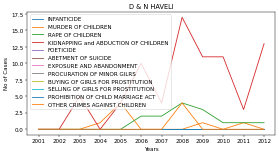

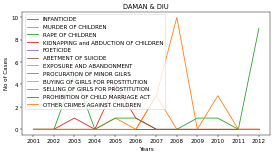

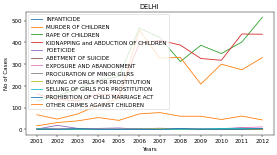

In [9]:
 for state in STATES_IN_INDIA:
        fig=plt.figure(figsize=(8, 4),dpi= 40, facecolor='w', edgecolor='k')
        plt.title(state)
        plt.xlabel('Years')
        plt.ylabel('No of Cases')
        for case in TYPES_OF_CASES:
            temp_df = df[(df['STATE/UT'] == state) & (df['CRIME HEAD'] == case)]
            N_cases = [temp_df[c].values[0] for c in years_title]
            plt.plot(years_title,N_cases)
            plt.legend(TYPES_OF_CASES)

In [13]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
        print()

Data set:
Feature 'STATE/UT' has 38 categories

Feature 'CRIME HEAD' has 13 categories



In [14]:
from sklearn import preprocessing
lab=preprocessing.LabelEncoder()
df['CRIME HEAD']=lab.fit_transform(df['CRIME HEAD'])
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,5,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,5,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,5,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,5,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,5,7,29,5,12,0,15,11,6,2,0,10,5


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
kmeans.fit(df.iloc[:,1:])


C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=9)

In [16]:
kmeans.cluster_centers_

array([[6.03233256e+00, 8.63972286e+00, 1.01593533e+01, 1.06397229e+01,
        1.14457275e+01, 1.33648961e+01, 1.63995381e+01, 1.62124711e+01,
        1.68036952e+01, 1.58614319e+01, 1.95404157e+01, 2.21639723e+01,
        2.76120092e+01],
       [0.00000000e+00, 1.31760000e+04, 1.22795000e+04, 1.32760000e+04,
        1.63565000e+04, 1.70065000e+04, 2.01205000e+04, 2.17610000e+04,
        2.51320000e+04, 2.54385000e+04, 2.68105000e+04, 3.47600000e+04,
        4.13695000e+04],
       [5.50000000e+00, 3.29075000e+03, 2.90575000e+03, 3.25350000e+03,
        4.00350000e+03, 4.19900000e+03, 4.55000000e+03, 4.98150000e+03,
        5.94100000e+03, 5.68150000e+03, 5.47450000e+03, 7.67300000e+03,
        9.59450000e+03],
       [4.00000000e+00, 1.25300000e+03, 2.02200000e+03, 2.28100000e+03,
        2.77100000e+03, 2.88700000e+03, 3.28600000e+03, 3.31700000e+03,
        3.50250000e+03, 3.40750000e+03, 3.70700000e+03, 3.61950000e+03,
        4.14600000e+03],
       [6.00000000e+00, 3.24050000e+

In [18]:
labels=kmeans.labels_
labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 7, 7, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 7, 0, 0, 2, 0, 0, 0, 0, 5,
       0, 0, 5, 2, 5, 0, 0, 7, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0,
       0, 0, 5, 5, 0, 5, 0, 8, 0, 5, 4, 0, 0, 0, 0, 5, 0, 0, 5, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,

In [19]:
import numpy as np
unique, counts = np. unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
dict_data

{0: 433, 1: 2, 2: 4, 3: 2, 4: 2, 5: 35, 6: 2, 7: 13, 8: 1}

In [20]:
df["cluster"] = kmeans.labels_

C:\Users\vikas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


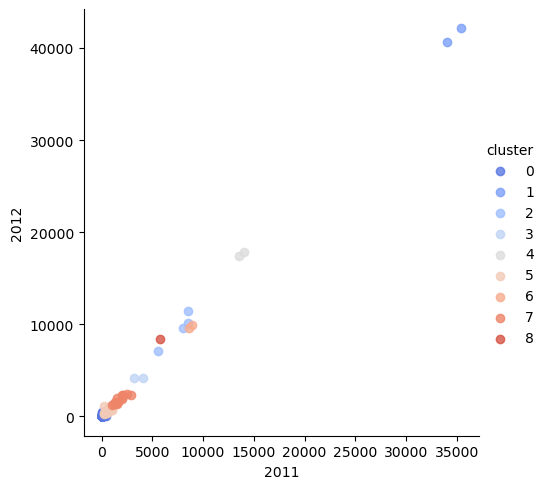

In [21]:
import seaborn as sns

sns.lmplot(x='2011', y='2012', data=df, hue='cluster', palette='coolwarm', height=5, aspect=1, fit_reg=False)


In [23]:
kmeans.inertia_

117250038.45688148

In [24]:
kmeans.score

<bound method _BaseKMeans.score of KMeans(n_clusters=9)>

In [25]:
df

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cluster
0,ANDHRA PRADESH,5,1,1,3,0,0,0,1,0,5,6,1,6,0
1,ARUNACHAL PRADESH,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,5,0,5,0,0,1,0,0,0,0,0,0,0,0
3,BIHAR,5,0,0,0,0,2,0,2,2,0,2,5,2,0
4,CHHATTISGARH,5,7,29,5,12,0,15,11,6,2,0,10,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,DELHI,0,386,391,437,558,590,1394,1247,1097,984,1020,1199,1351,7
490,LAKSHADWEEP,0,1,0,0,0,0,0,0,0,0,0,0,0,0
491,PUDUCHERRY,0,4,23,5,13,11,39,22,25,20,22,29,32,0
492,TOTAL (UTs),0,450,455,496,613,693,1499,1342,1268,1147,1185,1334,1495,7


In [26]:
cust = [[7,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341]]
kmeans.predict(cust)[0]

C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


7

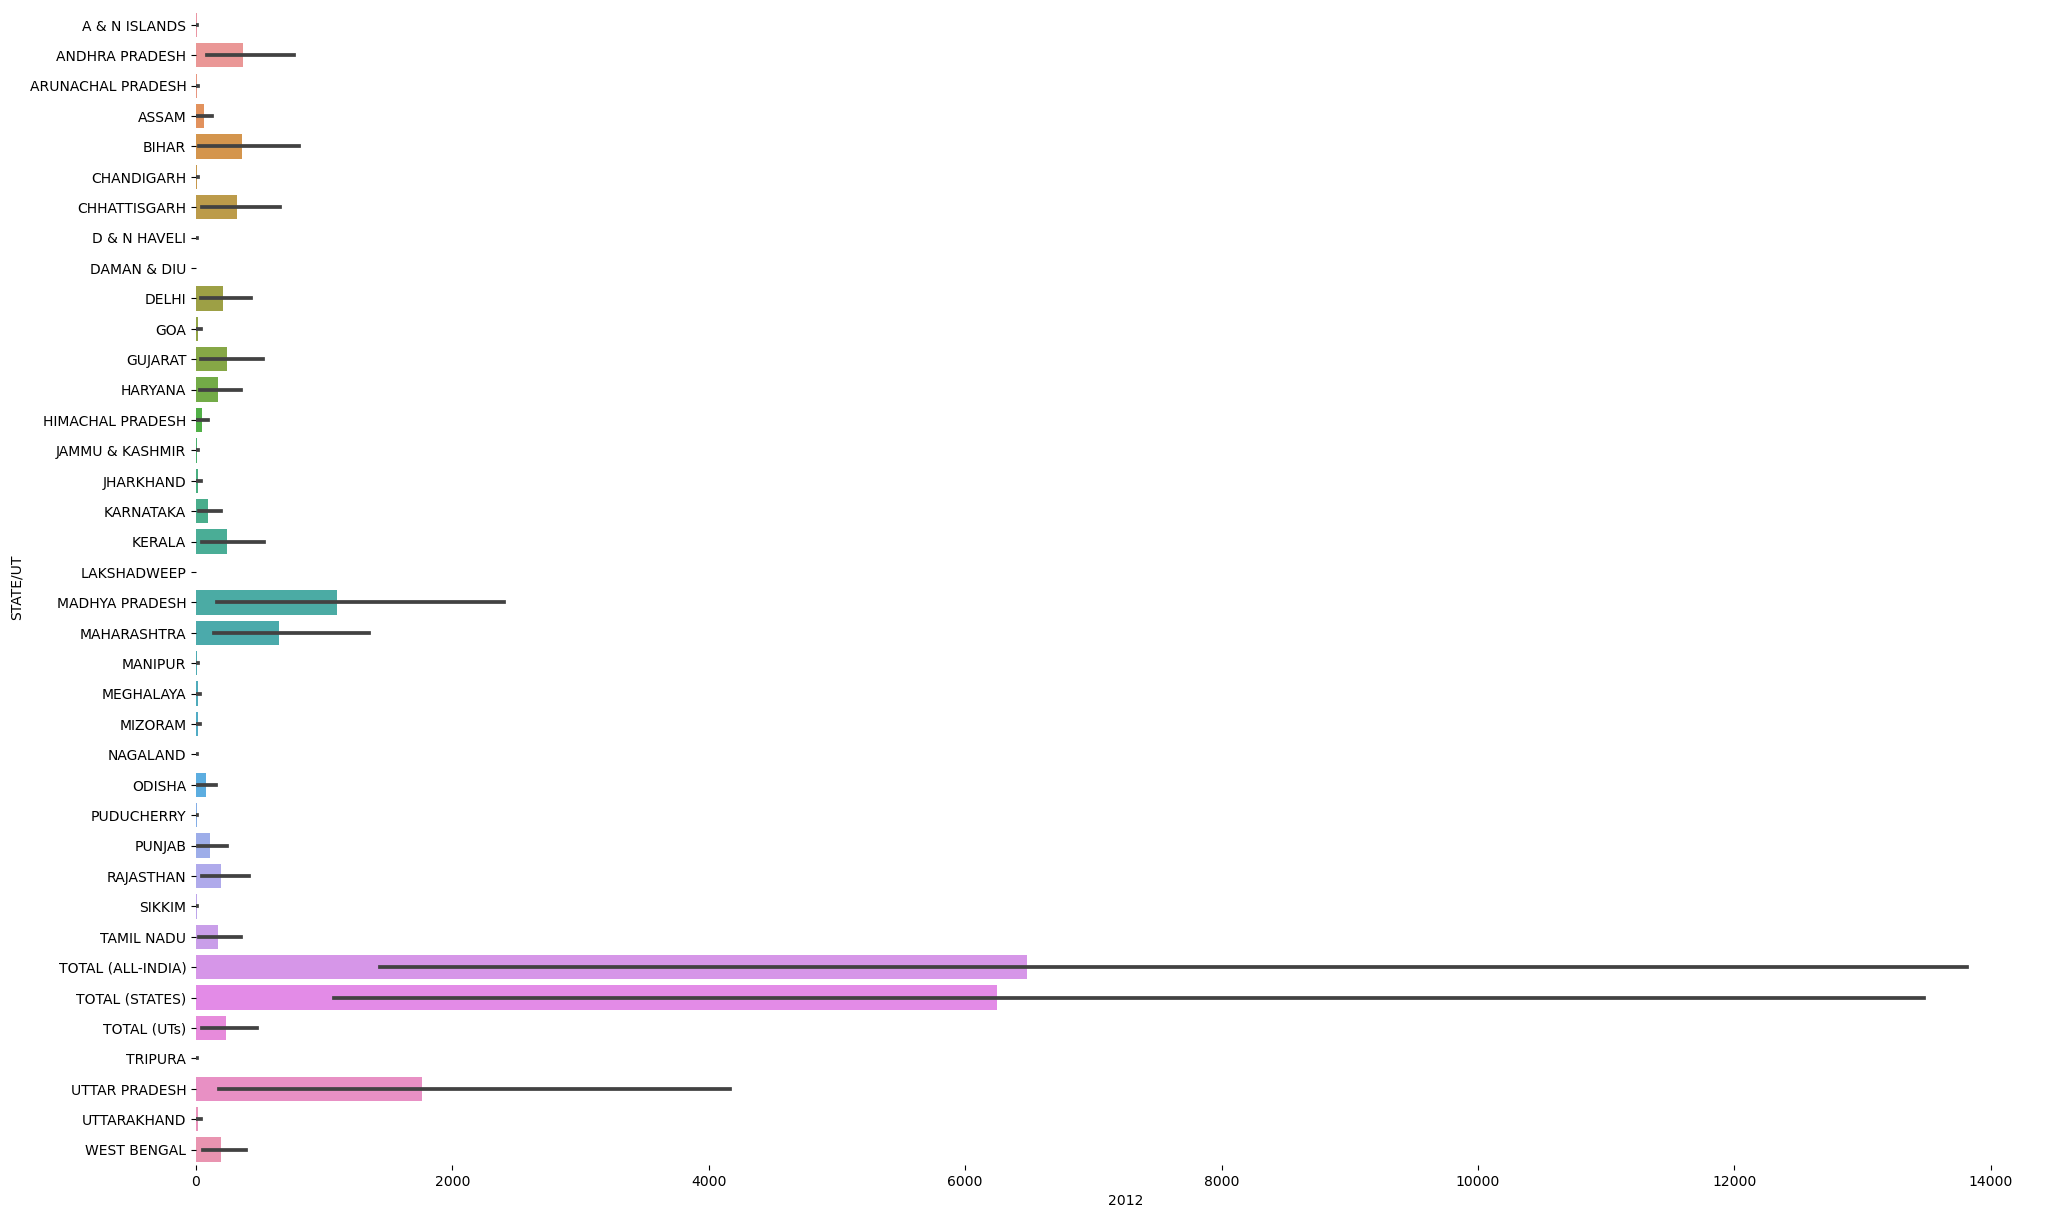

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(24, 15))
stats = df.sort_values(["cluster", "STATE/UT"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="STATE/UT", x="2012", data=stats, ax=ax)  # Corrected 'X' to 'x' and changed 'X' to 'x'
sns.despine(left=True, bottom=True)

plt.show()


In [28]:
x = df.iloc[:,1:14]
y = df.iloc[:,df.columns=='cluster']

In [29]:
print(x.head())
y.head()

   CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0           5     1     1     3     0     0     0     1     0     5     6   
1           5     0     0     0     0     0     0     0     0     0     0   
2           5     0     5     0     0     1     0     0     0     0     0   
3           5     0     0     0     0     2     0     2     2     0     2   
4           5     7    29     5    12     0    15    11     6     2     0   

   2011  2012  
0     1     6  
1     0     0  
2     0     0  
3     5     2  
4    10     5  


,cluster
0,0
1,0
2,0
3,0
4,0


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=0)

In [31]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are already defined
random_forest = RandomForestClassifier(n_estimators=100)  # Fixed typo in RandomForestClassifier
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(y_pred)

# Calculate and print accuracy
acc1 = accuracy_score(y_pred, y_test)
print(acc1)

# Generate and print classification report
c1f = classification_report(y_pred, y_test)
print(c1f)


C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 0 2 7 0 0 0 0 7 0 6 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 2 0 0
 0 0 7 0 0 5 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.9696969696969697
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3

    accuracy                           0.97        99
   macro avg       0.68      0.69      0.68        99
weighted avg       0.97      0.97      0.97        99



C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are already defined
lg = LogisticRegression()
lg.fit(x_train, y_train)
predic2 = lg.predict(x_test)

# Calculate and print accuracy
acc2 = accuracy_score(predic2, y_test)
print(acc2)

# Generate and print classification report
clf2 = classification_report(predic2, y_test)
print(clf2)


0.8080808080808081
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        79
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           5       0.25      0.33      0.29         3
           6       1.00      0.14      0.25         7
           7       0.50      0.40      0.44         5
           8       0.00      0.00      0.00         1

    accuracy                           0.81        99
   macro avg       0.33      0.23      0.24        99
weighted avg       0.81      0.81      0.78        99



C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [33]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are already defined
sv = svm.LinearSVC()  # Fixing the typo
sv.fit(x_train, y_train)
predic3 = sv.predict(x_test)

# Calculate and print accuracy
acc3 = accuracy_score(predic3, y_test)
print(acc3)

# Generate and print classification report
clf3 = classification_report(predic3, y_test)
print(clf3)


0.8484848484848485
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       0.00      0.00      0.00         0
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.75      0.60      0.67         5
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.85        99
   macro avg       0.27      0.24      0.25        99
weighted avg       0.80      0.85      0.82        99



C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vik

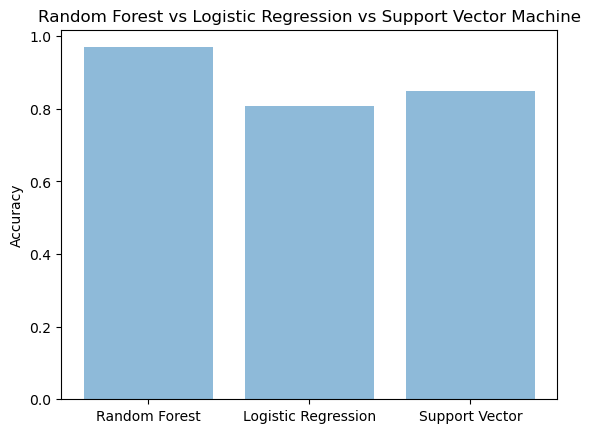

In [34]:
import numpy as np
import matplotlib.pyplot as plt

objects = ['Random Forest', 'Logistic Regression', 'Support Vector']
y_pos = np.arange(len(objects))
performance = [acc1, acc2, acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Random Forest vs Logistic Regression vs Support Vector Machine')
plt.show()
